In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('customer_churn.csv')

## 数据清理和转换工作

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


数据格式：
* RowNumber：行号，这个肯定没用，删除
* CustomerID：用户编号，这个是顺序发放的，删除
* Surname：用户姓名，对流失没有影响，删除
* CreditScore：信用分数，这个很重要，保留
* Geography：用户所在国家/地区，这个有影响，保留
* Gender:用户性别，可能有影响，保留
* Age:年龄，影响很大，年轻人更容易切换银行，保留
* Tenure:当了本银行多少年用户，很重要，保留
* Balance:存贷款情况，很重要，保留
* NumOfProducts:使用产品数量，很重要，保留
* HasCrCard:是否有本行信用卡，很重要，保留
* IsActiveMember:是否活跃用户，很重要，保留
* EstimatedSalary:估计收入，很重要，保留
* Exited:是否已流失，这将作为我们的标签数据

上述数据甄别过程，叫做特征工程（Feature Engineering)，这是机器学习里最常用的数据处理方法。
>如果数据量足够大，机器学习模型足够复杂，是可以跳过这一步的。但是由于我们的数据只有1000条，还需要手动筛选特征。

In [4]:
X = df.loc[:, ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
# 构建目标数据y
y = df.Exited

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

此时我们需要的数据基本上齐全了。但是我们发现有几列数据还不符合我们的要求，要做机器学习，只能给机器提供数值，而不能是字符串。显然其中的Geography和Gender两项数据都不符合要求。它们都是分类数据。我们需要做转换，把它们变成数值。

在Scikit-learn工具包里面，专门提供了方便的工具LabelEncoder，让我们可以方便地将类别信息变成数值


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
labelencoder1 = LabelEncoder()
X.Geography = labelencoder1.fit_transform(X.Geography)
labelencoder2 = LabelEncoder()
X.Gender = labelencoder2.fit_transform(X.Gender)

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


显然，Geography和Gender这两列都从原先描述类别的字符串，变成了数字。

这样是不是就完事大吉了呢？

不对，Gender还好说，只有两种取值方式，要么是男，要么是女。我们可以把“是男性”定义为1，那么女性就取值为0。两种取值只是描述类别不同，没有歧义。

而Geography就不同了。因为数据集里面可能的国家地区取值有3种，所以就转换成了0（法国）、1（德国）、2（西班牙）。问题是，这三者之间真的有序列（大小）关系吗？

答案自然是否定的。我们其实还是打算用数值描述分类而已。但是取值有数量的序列差异，就会给机器带来歧义。它并不清楚不同的取值只是某个国家的代码，可能会把这种大小关系带入模型计算，从而产生错误的结果。

解决这个问题，我们就需要引入OneHotEncoder。它也是Scikit-learn提供的一个类，可以帮助我们把类别的取值转变为多个变量组合表示。

咱们这个数据集里，可以把3个国家分别用3个数字组合来表示。例如法国从原先的0，变成(1, 0, 0)，德国从1变成(0, 1, 0)，而西班牙从2变成(0, 0, 1)。

这样，再也不会出现0和1之外的数字来描述类别，从而避免机器产生误会，错把类别数字当成大小来计算了。

In [11]:
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()

In [12]:
X[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

这样，总算转换完毕了吧？

没有。

因为本例中，OneHotEncoder转换出来的3列数字，实际上是不独立的。给定其中两列的信息，你自己都可以计算出其中的第3列取值。

好比说，某一行的前两列数字是(0, 0)，那么第三列肯定是1。因为这是转换规则决定的。3列里只能有1个是1，其余都是0。

如果你做过多元线性回归，应该知道这种情况下，我们是需要去掉其中一列，才能继续分析的。不然会落入“虚拟变量陷阱”（dummy variable trap）。

我们删掉第0列，避免掉进坑里。

In [13]:
X = np.delete(X, [0], 1)

In [14]:
X[0]

array([0.0000000e+00, 0.0000000e+00, 6.1900000e+02, 0.0000000e+00,
       4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

检查完毕，现在咱们的特征矩阵处理基本完成。

但是监督式学习，最重要的是有标签(label)数据。本例中的标签就是用户是否流失。我们目前的标签数据框，是这个样子的。

In [15]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [16]:
y = y[:, np.newaxis]

In [17]:
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [18]:
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y).toarray()

In [19]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [66]:
len(X_train)

9000

In [67]:
len(X_test)

1000

在机器学习之前，需要进行数据的标准化的处理。因为原先每一列数字的取值范围都各不相同，因此有的列方差要远远大于其他列。这样对机器来说，也是很困扰的。数据的标准化处理，可以在保持列内数据多样性的同时，尽量减少不同类别之间差异的影响，可以让机器公平的对待全部特征。

可以使用Scikit-learn的StandardScaler来完成这一过程

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

>注意，只对特征矩阵做标准化，标签不动。另外训练集和测试集需要按照统一的标准变化。

In [70]:
X_train

array([[-0.5756396 , -0.57478426, -0.23053642, ...,  0.64376017,
         0.97108454,  0.45151104],
       [-0.5756396 , -0.57478426,  0.67997496, ...,  0.64376017,
        -1.02977646, -1.4892912 ],
       [-0.5756396 , -0.57478426, -0.34435035, ...,  0.64376017,
         0.97108454,  0.26357605],
       ...,
       [-0.5756396 , -0.57478426,  0.90760281, ...,  0.64376017,
        -1.02977646,  1.41226003],
       [-0.5756396 ,  1.73978322, -0.62371179, ...,  0.64376017,
         0.97108454,  0.84385822],
       [ 1.73719807, -0.57478426, -0.28227003, ...,  0.64376017,
        -1.02977646,  0.32389292]])

## 决策树训练

### 使用经典的机器学习

In [71]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [72]:
# predict
y_pred = clf.predict(X_test)

In [73]:
y_pred

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [74]:
# 使用scikit-learn的classification-report模块生成分析报告
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88       794
          1       0.54      0.54      0.54       206

avg / total       0.81      0.81      0.81      1000



>结果分析
>决策树在咱们的数据上，表现的不错，总体的准确率为0.81，召回率0.81，f1得分0.81。相当于对10个客户做判断，有８次是正确的，但是这样的准确率可以么，我们或许可以调整决策树的参数做优化，尝试改进预测结果。

### 使用深度学习框架-tensorflow

In [77]:
import tflearn

开始搭建网络

首先是输入层

In [78]:
net = tflearn.input_data(shape=[None, 11])

我们输入的数据，是特征矩阵，经过我们处理后，特征矩阵现在有11列，因此shape第二项写１１

shape的第一项，None，指的是要输入的特征矩阵行数。因为我们现在是搭建模型，后面特征矩阵有可能一次输入，有可能分成组块输入，长度可大可小，无法事先确定。所以这里填写None

tflearn会在我们实际执行训练的时候，自己读入特征矩阵的尺寸，来处理这个数值。

下面我们搭建隐藏层，我们需要使用深度学习，搭建３层

In [79]:
net = tflearn.fully_connected(net, 6, activation='relu')
net = tflearn.fully_connected(net, 6, activation='relu')
net = tflearn.fully_connected(net, 6, activation='relu')

激励函数使用的是relu函数，如下图
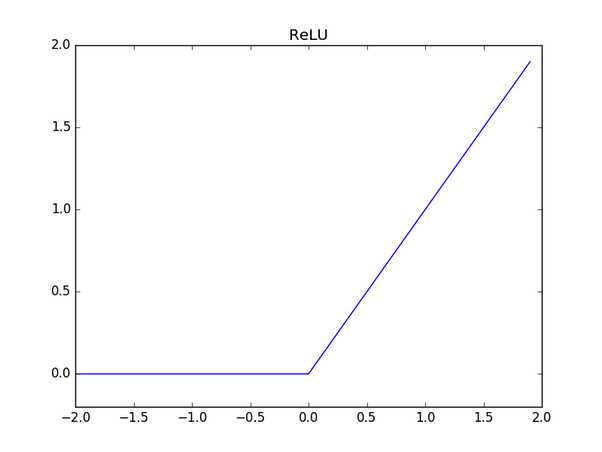

>隐藏层里，每一层我们都设置了６个神经元。其实至今为止，也不存在最优神经元数量的计算公式。　工程界的一种做法，是把输入层的神经元数量，加上输出层神经元数量，除以２取整。

搭好了３个中间隐藏层，来搭建输出层

In [80]:
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

这里用２个神经元做输出，并且说明使用回归方法。

输出层选用的激活函数为softmax，处理分类任务的时候，softmax比较合适。它会告诉我们每一类的可能性，其中数值最高的，可以作为我们的分类结果。

In [81]:
model = tflearn.DNN(net)

In [82]:
model.fit(X_train, y_train, n_epoch=30, batch_size=32, show_metric=True)

Training Step: 8459  | total loss: 0.40715 | time: 0.546s
| Adam | epoch: 030 | loss: 0.40715 - acc: 0.8224 -- iter: 8992/9000
Training Step: 8460  | total loss: 0.40852 | time: 0.548s
| Adam | epoch: 030 | loss: 0.40852 - acc: 0.8083 -- iter: 9000/9000
--


参数解释：
* n_epoch: 数据训练几个轮次
* batch_size: 每一次输入给模型的数据行数
* show_metric: 训练过程中要不要打印结果

### 评估

In [83]:
X_test[0]

array([ 1.6484757 , -0.56503205, -0.57711396, -1.08784471, -0.43717493,
        0.97796967,  0.8817585 , -0.87301712,  0.66714819,  0.96269532,
        1.63242964])

In [84]:
y_pred = model.predict(X_test)

In [85]:
y_pred[0]

array([0.79747987, 0.20252006], dtype=float32)

In [86]:
y_test[0]

array([1., 0.])

使用训练好的模型预测一个结果，发现是0.79，模型判断客户不流失的可能性是０．７９　，实际结果是１，客户没有流失。预测正确。

使用evaluate来评价模型

In [87]:
score = model.evaluate(X_test, y_test)
print('Test Accuarcy : %0.4f%%' % (score[0]*100))

Test Accuarcy : 84.0000%
